# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as image_file:
    print(base64.b64encode(image_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

image_data = base64.b64decode(base64_image)
image = Image.open(io.BytesIO(image_data))

plt.imshow(image)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [137]:

# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [138]:
image = cv2.imread("image.jpg")

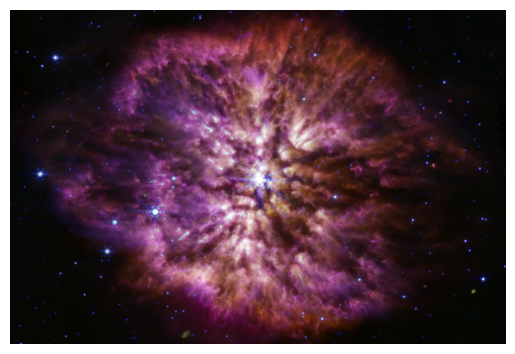

In [139]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

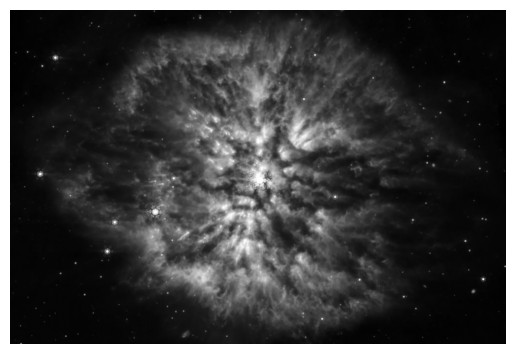

In [140]:
# Grayscale using weighted sum formula
r,g,b = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]
w_gray = 0.299 * r + 0.587 * g + 0.114 * b
plt.imshow(w_gray, cmap='gray')
plt.axis("off")
plt.show()

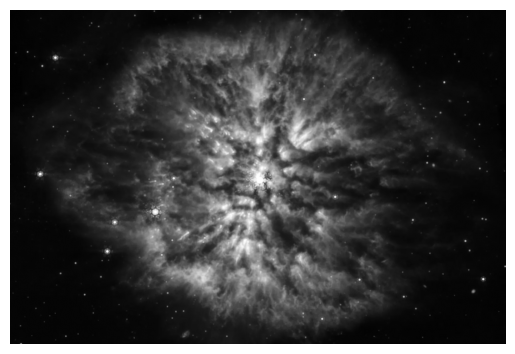

In [141]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.axis("off")
plt.show()

In [142]:
print(w_gray)

[[3.647 3.647 3.647 ... 4.761 4.761 4.761]
 [3.647 3.647 3.647 ... 4.761 4.761 4.761]
 [3.647 3.647 3.647 ... 4.761 4.761 4.761]
 ...
 [7.131 7.131 7.131 ... 5.761 5.761 5.761]
 [7.131 7.131 7.131 ... 5.761 5.761 5.761]
 [7.131 7.131 7.131 ... 5.761 5.761 5.761]]


In [143]:
w_gray[0].dtype


dtype('float64')

In [144]:
print(image_gray)

[[4 4 4 ... 5 5 5]
 [4 4 4 ... 5 5 5]
 [4 4 4 ... 5 5 5]
 ...
 [7 7 7 ... 6 6 6]
 [7 7 7 ... 6 6 6]
 [7 7 7 ... 6 6 6]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [145]:
# B1
f = np.fft.fft2(image_gray) # Computing FFT of Grayscale image
fshift = np.fft.fftshift(f)

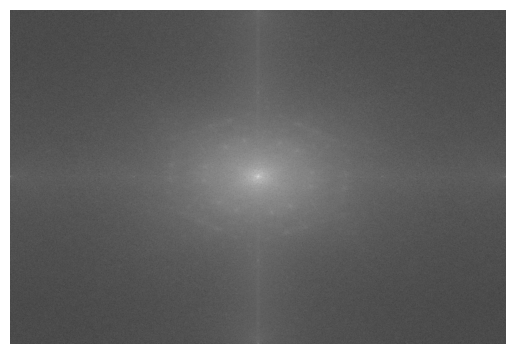

In [146]:
# B2
f_mag = np.log(np.abs(fshift)+1) # Compute Magnitude

# Display Magnitude Spectrum
plt.imshow(f_mag, cmap='gray')
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 low_pass_filter masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create high_pass_filterh_pass_filter mask

1. Apply

2. Reconstruct

### C3. Create a square low_pass_filter mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [147]:
# mask of a radius r passed as a parameter
def create_mask(fshift, r):
    mask = np.zeros(fshift.shape)
    mask = cv2.circle(mask, (mask.shape[1]//2, mask.shape[0]//2), r, 1, -1)
    return mask

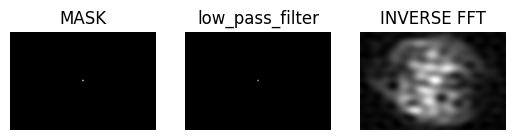

In [148]:
# C1
# For Radius 10
mask_10 = create_mask(fshift, 10)

low_pass_filter_10 = mask_10 * fshift # Convolution
filter_10 = np.fft.ifftshift(low_pass_filter_10)
inverse_10 = np.fft.ifft2(filter_10) # Inverse FFT

image1 =mask_10
image2 = np.log(abs(low_pass_filter_10)+1)
image3 = abs(inverse_10)



plt.subplot(1,3,1)
plt.imshow(image1, cmap='gray')
plt.title("MASK")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(image2, cmap='gray')
plt.title("low_pass_filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(image3, cmap='gray')
plt.title("INVERSE FFT")
plt.axis("off")

plt.show()

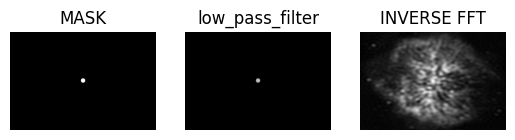

In [149]:
# For Radius 30
mask_30 = create_mask(fshift, 30)

low_pass_filter_30 = mask_30 * fshift
filter_30 = np.fft.ifftshift(low_pass_filter_30)
inverse_30 = np.fft.ifft2(filter_30)

image1 =mask_30
image2 = np.log(abs(low_pass_filter_30)+1)
image3 = abs(inverse_30)



plt.subplot(1,3,1)
plt.imshow(image1, cmap='gray')
plt.title("MASK")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(image2, cmap='gray')
plt.title("low_pass_filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(image3, cmap='gray')
plt.title("INVERSE FFT")
plt.axis("off")

plt.show()

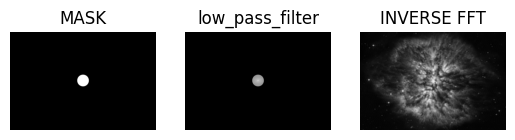

In [150]:
# For Radius 80
mask_80 = create_mask(fshift, 80)

low_pass_filter_80 = mask_80 * fshift
filter_80 = np.fft.ifftshift(low_pass_filter_80)
inverse_80 = np.fft.ifft2(filter_80)

image1 =mask_80
image2 = np.log(abs(low_pass_filter_80)+1)
image3 = abs(inverse_80)



plt.subplot(1,3,1)
plt.imshow(image1, cmap='gray')
plt.title("MASK")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(image2, cmap='gray')
plt.title("low_pass_filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(image3, cmap='gray')
plt.title("INVERSE FFT")
plt.axis("off")

plt.show()

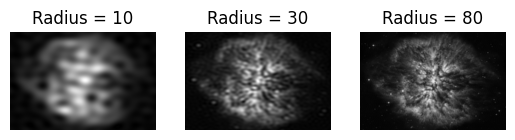

In [151]:
image1= abs(inverse_10)
image2= abs(inverse_30)
image3= abs(inverse_80)

plt.subplot(1,3,1)
plt.imshow(image1, cmap='gray')
plt.title("Radius = 10")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(image2, cmap='gray')
plt.title("Radius = 30")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(image3, cmap='gray')
plt.title("Radius = 80")
plt.axis("off")

plt.show()


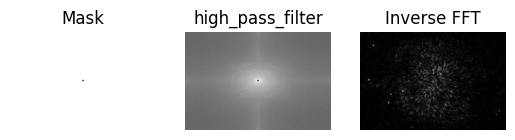

In [152]:
# C2
# high_pass_filter corresponding to radius 10
high_pass_filter_10 = (1 - mask_10) * fshift
filter_h10 = np.fft.ifftshift(high_pass_filter_10)
inverse_h10 = np.fft.ifft2(np.fft.ifftshift(filter_h10)) # Inverse FFT

plt.subplot(1,3,1)
plt.imshow(1-mask_10, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(abs(high_pass_filter_10)+1), cmap='gray')
plt.title("high_pass_filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(abs(inverse_h10), cmap='gray')
plt.title("Inverse FFT")
plt.axis("off")

plt.show()


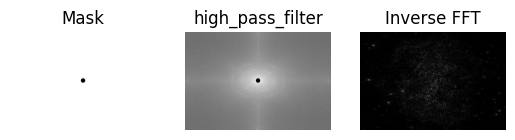

In [153]:
# high_pass_filter corresponding to radius 30
high_pass_filter_30 = (1 - mask_30) * fshift
filter_h30 = np.fft.ifftshift(high_pass_filter_30)
inverse_h30 = np.fft.ifft2(np.fft.ifftshift(filter_h30)) # Inverse FFT

plt.subplot(1,3,1)
plt.imshow(1-mask_30, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(abs(high_pass_filter_30)+1), cmap='gray')
plt.title("high_pass_filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(abs(inverse_h30), cmap='gray')
plt.title("Inverse FFT")
plt.axis("off")

plt.show()

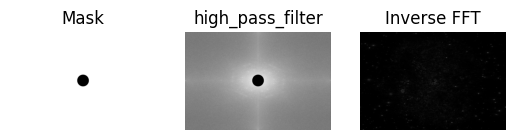

In [154]:
# high_pass_filter corresponding to radius 80
high_pass_filter_80 = (1 - mask_80) * fshift
filter_h80 = np.fft.ifftshift(high_pass_filter_80)
inverse_h80 = np.fft.ifft2(np.fft.ifftshift(filter_h80)) # Inverse FFT

plt.subplot(1,3,1)
plt.imshow(1-mask_80, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(abs(high_pass_filter_80)+1), cmap='gray')
plt.title("high_pass_filter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(abs(inverse_h80), cmap='gray')
plt.title("Inverse FFT")
plt.axis("off")

plt.show()

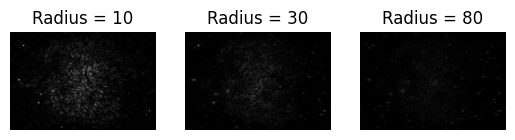

In [155]:

plt.subplot(1,3,1)
plt.imshow(abs(inverse_h10), cmap='gray')
plt.title("Radius = 10")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(abs(inverse_h30), cmap='gray')
plt.title("Radius = 30")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(abs(inverse_h80), cmap='gray')
plt.title("Radius = 80")
plt.axis("off")

plt.show()

In [156]:
# C3
# Square low_pass_filter Mask
sqr_low_pass_filter_mask = np.zeros(fshift.shape)
row, col = sqr_low_pass_filter_mask.shape
sqr_low_pass_filter_mask[(row//2-25):(row//2+25), (col//2-25):(col//2+25)] = 1

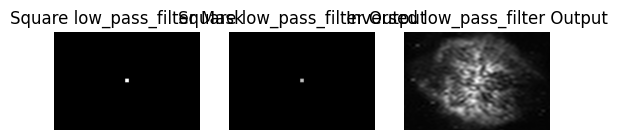

In [157]:
sqr_low_pass_filter = sqr_low_pass_filter_mask * fshift
filter_sqr = np.fft.ifftshift(sqr_low_pass_filter)
inverse_sqr = np.fft.ifft2(filter_sqr)

plt.subplot(1,3,1)
plt.imshow(sqr_low_pass_filter_mask, cmap='gray')
plt.title("Square low_pass_filter Mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(np.log(abs(sqr_low_pass_filter)+1), cmap='gray')
plt.title("Square low_pass_filter Output")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(abs(inverse_sqr), cmap='gray')
plt.title("Inversed low_pass_filter Output")
plt.axis("off")

plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [158]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

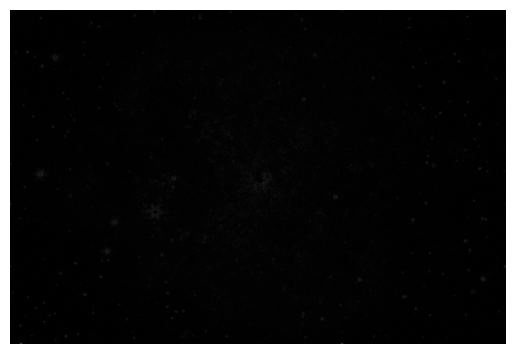

In [159]:
# D1
# Phase-only reconstruction
phase_only = fshift / np.abs(fshift)
phase_only_shift = np.fft.ifftshift(phase_only)
phase_only_image = np.fft.ifft2(phase_only_shift)

# Display
plt.imshow(abs(phase_only_image), cmap='gray')
plt.axis("off")
plt.show()

In [160]:
phase_angle = np.angle(fshift)

phase_from_angle = np.exp(1j * phase_angle) # exp(jθ) = cos(θ) + j sin(θ)

phase_from_angle_ishift = np.fft.ifftshift(phase_from_angle)
image_phase_from_angle = np.fft.ifft2(phase_from_angle_ishift)
image_phase_from_angle = np.abs(image_phase_from_angle)

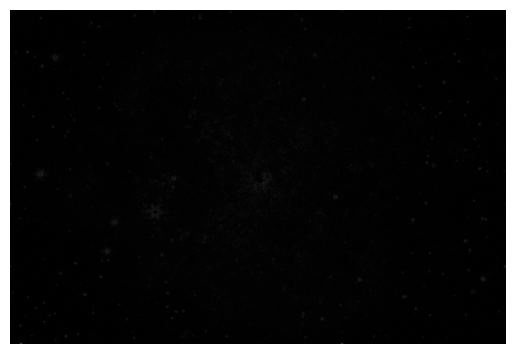

In [161]:
# Display image using np.angle()
plt.imshow(image_phase_from_angle, cmap='gray')
plt.axis("off")
plt.show()

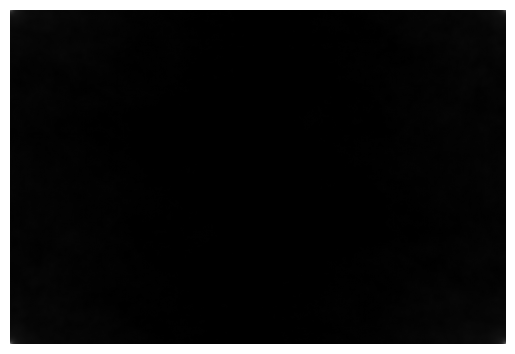

In [162]:
# D2
mag_only = np.abs(fshift)

# Reconstruction
mag_only_shift = np.fft.ifftshift(mag_only)
mag_only_image = np.fft.ifft2(mag_only_shift)

# Display
plt.imshow(abs(mag_only_image), cmap='gray')
plt.axis("off")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

image.png

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [163]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.